In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
from scipy import stats
import time

# set seaborn settings
sns.set()
plt.rcParams["patch.force_edgecolor"] = True # set lines
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')

## import custom helper functions
import helpers as h

In [2]:
econ = pd.read_csv("data/Chicago_Socioeconomic.csv")

In [3]:
econ.head()

,Community Area Number,COMMUNITY AREA NAME,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,HARDSHIP INDEX
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


In [4]:
newEconColumns = ["CommunityAreaNumber", "CommunityAreaName", "PercentHousingCrowded", \
                  "PercentBelowPoverty", "PercentUnemployed", "PercentNoHsDiploma", "PercentUnder18OrOver64", \
                  "PercentCapitaIncome", "HardshipIndex"]

econ.columns = newEconColumns

econ.head()

,CommunityAreaNumber,CommunityAreaName,PercentHousingCrowded,PercentBelowPoverty,PercentUnemployed,PercentNoHsDiploma,PercentUnder18OrOver64,PercentCapitaIncome,HardshipIndex
0,1,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39
1,2,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46
2,3,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
3,4,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17
4,5,North Center,0.3,7.5,5.2,4.5,26.2,57123,6


In [5]:
fallDf = pd.read_csv("data/2016/fall.csv")
winterDf = pd.read_csv("data/2016/winter.csv")
springDf = pd.read_csv("data/2016/spring.csv")
summerDf = pd.read_csv("data/2016/summer.csv")

In [6]:
# i don't wanna work on the entire dataset. 
# taking a fraction only.

fallFrac = fallDf.sample(frac = 0.05)
winterFrac = winterDf.sample(frac = 0.05)
springFrac = springDf.sample(frac = 0.05)
summerFrac = summerDf.sample(frac = 0.05)

In [7]:
fall = h.convertDataType(fallFrac)
winter = h.convertDataType(winterFrac)
spring = h.convertDataType(springFrac)
summer = h.convertDataType(summerFrac)

In [8]:
fall["season"] = "Fall"
winter["season"] = "Winter"
spring["season"] = "Spring"
summer["season"] = "Summer"


all = pd.DataFrame()
all = pd.concat([fall, winter, spring, summer])
print("Records:", len(all))

Records: 993913


In [9]:
all.head()

,taxi_id,tolls,trip_start_timestamp,trip_end_timestamp,company,dropoff_centroid_longitude,dropoff_centroid_latitude,fare,payment_type,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_community_area,pickup_community_area,tips,trip_miles,trip_seconds,trip_total,season
2714551,10b2fc771259a5d8a802c85b6a1d0f5efe023f55bbd504...,0.0,10/30/2016 01:00 AM,10/30/2016 01:15 AM,Blue Ribbon Taxi Association Inc.,-87.670167,42.009623,11.50,Credit Card,41.965812,-87.655879,1.0,3.0,3.0,0.2,720.0,14.50,Fall
2000063,64563484294c90c6708b7a8c4d9618152780359329e038...,0.0,10/16/2016 01:45 AM,10/16/2016 01:45 AM,Blue Ribbon Taxi Association Inc.,-87.647079,41.942577,3.75,Cash,41.942577,-87.647079,6.0,6.0,0.0,0.0,60.0,3.75,Fall
744211,67cbad0de729d814d848a331b1e37cb8df3a5537fc7d87...,0.0,09/20/2016 09:15 AM,09/20/2016 09:30 AM,NaN,-87.632746,41.880994,10.00,Credit Card,41.899156,-87.626211,32.0,8.0,2.0,1.7,960.0,12.50,Fall
2266248,f55addae8ca796ec4b405f2aff2b703fa3e84d285bf4c1...,0.0,10/21/2016 12:45 PM,10/21/2016 01:00 PM,Taxi Affiliation Services,-87.632746,41.880994,6.75,Cash,41.892042,-87.631864,32.0,8.0,0.0,0.0,540.0,8.25,Fall
1640803,18b7e9c5ffaa8a2c58448ff759feaff82a38215187e3d7...,0.0,10/08/2016 04:00 PM,10/08/2016 04:00 PM,Taxi Affiliation Services,-87.620993,41.884987,6.00,Cash,41.890922,-87.618868,32.0,8.0,0.0,0.9,360.0,6.00,Fall


Now I have sampled version of each seasons. I'd like to look through the earnings of each company throughout each season to see who earns more. For the sake of simplicity, I'll just look at the "trip_total" column for comparison. 

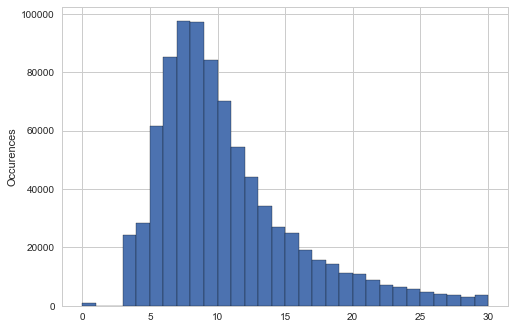

In [10]:
h.buildHistogram(all["trip_total"])

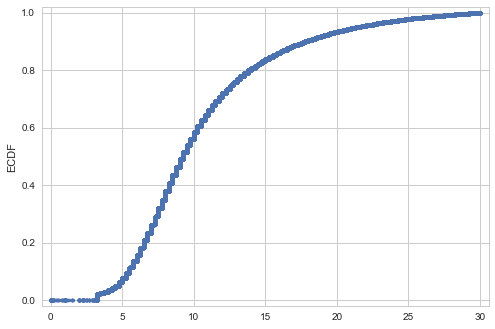

In [11]:
h.buildECDF(all["trip_total"])

In [12]:
all["trip_total"].describe()

count    993913.000000
mean         16.628871
std          32.387193
min           0.000000
25%           7.500000
50%          10.000000
75%          16.500000
max        9166.040000
Name: trip_total, dtype: float64

## Comparing seasonal earnings

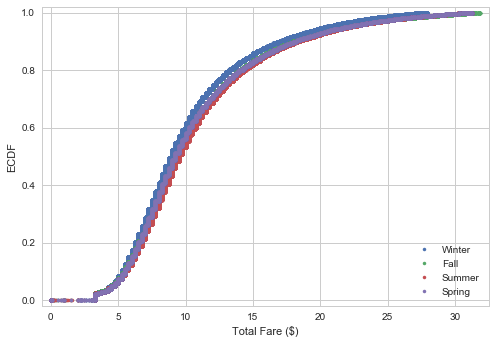

In [13]:
# Generate CDFs
x_winter, y_winter = h.getECDF(winter["trip_total"])
x_fall, y_fall = h.getECDF(fall["trip_total"])
x_summer, y_summer = h.getECDF(summer["trip_total"])
x_spring, y_spring = h.getECDF(spring["trip_total"])

# plot CDFs
_ = plt.plot(x_winter, y_winter, marker = ".", linestyle = "none")
_ = plt.plot(x_fall, y_fall, marker = ".", linestyle = "none")
_ = plt.plot(x_summer, y_summer, marker = ".", linestyle = "none")
_ = plt.plot(x_spring, y_spring, marker = ".", linestyle = "none")

# Make 2% margin
plt.margins(0.02)

# Make a legend and show the plot
_ = plt.legend(('Winter', 'Fall', 'Summer', 'Spring'), loc='lower right')

_ = plt.xlabel("Total Fare ($)")
_ = plt.ylabel("ECDF")
plt.show()

Summer may yield better earnings than Winter due to the good weather. People may want to go out more and take longer trips to farther places. 

In [14]:
winterEarnings = np.array(winter["trip_total"])
summerEarnings = np.array(summer["trip_total"])
springEarnings = np.array(spring["trip_total"])
fallEarnings = np.array(fall["trip_total"])

number_of_experiments = 10000

Are the earnings for the 2 seasons different? If they are identical, they should have the same mean earnings so the difference in the mean earnings should be zero. We'll choose the difference in mean as our test statistic. The P-Value tells you that the percentage of chance that you would get the difference of means observed in the experiment if the earnings yields are exactly the same. 

Let's test out this hypothesis. 

* H0 = There is no difference between Summer and Winter earnings.
* H1 = There is a difference between Summer and Winter earnings. 

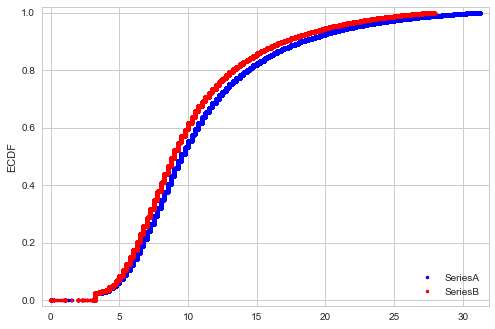

Empirical Difference in Means: 1.35106420834

H0 = No difference between the 2 distributions
H1 = There is a difference between the 2 distributions
P-Value: 0.0 | Reject H0


In [15]:
# compare summer and winter earnings
h.compareCDF(summer["trip_total"], winter["trip_total"])
h.identicalMeans(summerEarnings, winterEarnings, number_of_experiments)

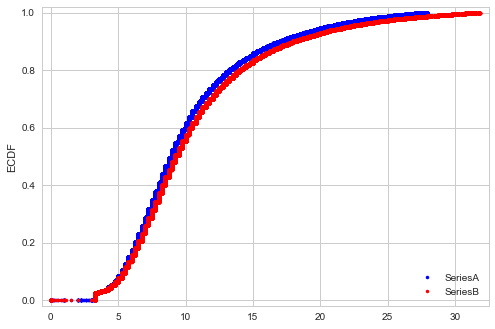

Empirical Difference in Means: -1.67536731908

H0 = No difference between the 2 distributions
H1 = There is a difference between the 2 distributions
P-Value: 0.0 | Reject H0


In [16]:
h.compareCDF(winter["trip_total"], fall["trip_total"])
h.identicalMeans(winterEarnings, fallEarnings, number_of_experiments)

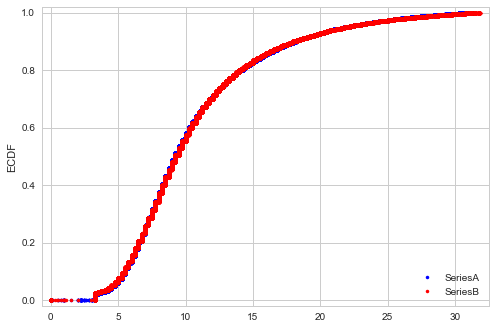

Empirical Difference in Means: -0.465191518072

H0 = No difference between the 2 distributions
H1 = There is a difference between the 2 distributions
P-Value: 0.0001 | Reject H0


In [17]:
h.compareCDF(spring["trip_total"], fall["trip_total"])
h.identicalMeans(springEarnings, fallEarnings, number_of_experiments)

What about Fall and Summer?

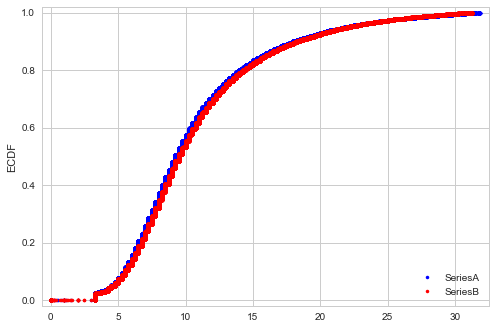

Empirical Difference in Means: 0.324303110742

H0 = No difference between the 2 distributions
H1 = There is a difference between the 2 distributions
P-Value: 0.0028 | Reject H0


In [18]:
h.compareCDF(fall["trip_total"], summer["trip_total"])
h.identicalMeans(fallEarnings, summerEarnings, number_of_experiments)

## Comparing taxi companies

Is there a real difference between first place and last place? If so, where do they pick up/drop off their passengers? To find out, I need obtain records with Pickup/Dropoff locations. Unfortunately, some companies do not publish their locations so we can only work with what we have. 

In [19]:
# drop trip records that do not have company name, pickup/dropoff locations
interestedTrips = all.dropna(subset = ["company", "pickup_community_area", \
                                       "dropoff_community_area"])

taxiCompanies = set(np.array(interestedTrips["company"]))
taxiCompanies = list(taxiCompanies)
print(taxiCompanies)

['3152 - 97284 Crystal Abernathy', '2092 - 61288 Sbeih company', '3669 - 85800 Jordan Taxi Inc', 'Chicago Elite Cab Corp. (Chicago Carriag', '3201 - C&D Cab Co Inc', 'KOAM Taxi Association', '6742 - 83735 Tasha ride inc', 'Northwest Management LLC', 'Chicago Medallion Management', '2809 - 95474 C & D Cab Co Inc.', '2241 - 44667 - Felman Corp, Manuel Alonso', '5874 - 73628 Sergey Cab Corp.', '0694 - 59280 Chinesco Trans Inc', '1247 - 72807 Daniel Ayertey', '4615 - 83503 Tyrone Henderson', '4623 - 27290 Jay Kim', '4053 - 40193 Adwar H. Nikola', 'Blue Ribbon Taxi Association Inc.', '5997 - 65283 AW Services Inc.', '5129 - 87128', '3319 - CD Cab Co', '3556 - 36214 RC Andrews Cab', '3591 - 63480 Chuks Cab', 'Choice Taxi Association', '0118 - 42111 Godfrey S.Awir', '585 - 88805 Valley Cab Co', '2823 - 73307 Seung Lee', 'Dispatch Taxi Affiliation', '5074 - 54002 Ahzmi Inc', '3201 - CD Cab Co Inc', '2733 - 74600 Benny Jona', '6747 - Mueen Abdalla', '3620 - 52292 David K. Cab Corp.', '4197 - 41

In [20]:
meanEarnings = interestedTrips.groupby(["company"])["trip_total"] \
    .agg(["mean", "count"]).sort_values("mean", ascending = False).reset_index()

# I only care about Taxi companies that made at least 100 trips in 2016
meanEarnings = meanEarnings[meanEarnings["count"] >= 100].reset_index(drop = True)

meanEarnings

,company,mean,count
0,4623 - 27290 Jay Kim,19.183594,128
1,5074 - 54002 Ahzmi Inc,18.650000,144
2,6747 - Mueen Abdalla,18.467711,201
3,2733 - 74600 Benny Jona,18.033412,170
4,5874 - 73628 Sergey Cab Corp.,17.910370,135
5,4197 - 41842 Royal Star,17.661988,161
6,0118 - 42111 Godfrey S.Awir,16.960960,198
7,2192 - 73487 Zeymane Corp,16.755685,146
8,3623 - 72222 Arrington Enterprises,16.455882,119
9,Choice Taxi Association,16.366581,51926


In [21]:
first = meanEarnings.head(1)["company"].iloc[0]
print("First:", first)

last = meanEarnings.tail(1)["company"].iloc[0]
print("Last:", last)

firstDf = interestedTrips[interestedTrips["company"] == first]
lastDf = interestedTrips[interestedTrips["company"] == last]

First: 4623 - 27290 Jay Kim
Last: Chicago Elite Cab Corp. (Chicago Carriag


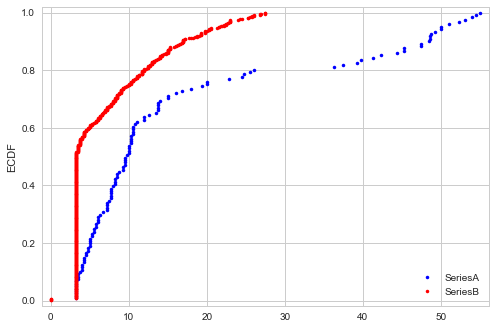

Empirical Difference in Means: 9.118373049847788

H0 = No difference between the 2 distributions
H1 = There is a difference between the 2 distributions
P-Value: 0.0 | Reject H0


In [22]:
h.compareCDF(firstDf["trip_total"], lastDf["trip_total"])

h.identicalMeans(firstDf["trip_total"], \
                 lastDf["trip_total"], \
                 number_of_experiments)

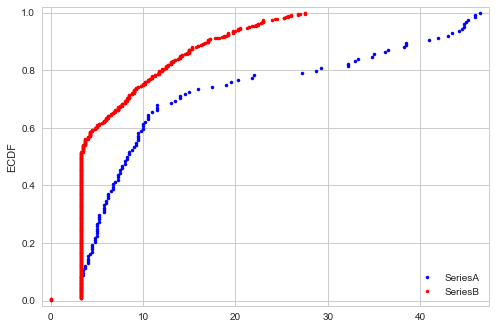

Empirical Difference in Means: 5.698841799847791

H0 = No difference between the 2 distributions
H1 = There is a difference between the 2 distributions
P-Value: 0.0 | Reject H0


In [23]:
h.compareCDF(firstDf["fare"], lastDf["fare"])
h.identicalMeans(firstDf["fare"], lastDf["fare"], number_of_experiments)

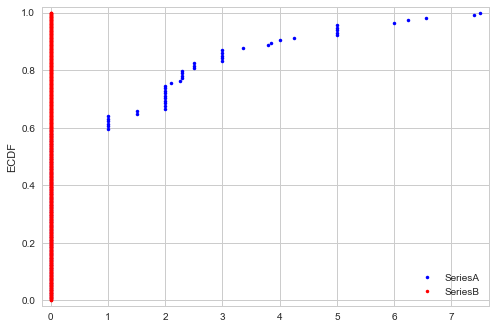

Empirical Difference in Means: 2.1460937500000004

H0 = No difference between the 2 distributions
H1 = There is a difference between the 2 distributions
P-Value: 0.0 | Reject H0


In [24]:
h.compareCDF(firstDf["tips"], lastDf["tips"])
h.identicalMeans(firstDf["tips"], lastDf["tips"], number_of_experiments)

### Joining socioeconomic data

In [26]:
interestedCompanies = np.array(meanEarnings["company"])

interestedDf = interestedTrips[interestedTrips["company"]\
                               .isin(interestedCompanies)]

print("Before Join:", len(interestedDf))

econ["CommunityAreaNumber"] = econ["CommunityAreaNumber"]\
    .astype("float").fillna(0.0)
    
interestedDf = pd.merge(interestedDf, econ, left_on = "pickup_community_area", \
                     right_on = "CommunityAreaNumber", how = "inner")

print("After Join:", len(interestedDf))

interestedDf.to_csv("data/2016/trip_socioeconomic_joined.csv", index = False)
interestedDf.head()

Before Join: 527014
After Join: 527014


,taxi_id,tolls,trip_start_timestamp,trip_end_timestamp,company,dropoff_centroid_longitude,dropoff_centroid_latitude,fare,payment_type,pickup_centroid_latitude,...,season,CommunityAreaNumber,CommunityAreaName,PercentHousingCrowded,PercentBelowPoverty,PercentUnemployed,PercentNoHsDiploma,PercentUnder18OrOver64,PercentCapitaIncome,HardshipIndex
0,10b2fc771259a5d8a802c85b6a1d0f5efe023f55bbd504...,0.0,10/30/2016 01:00 AM,10/30/2016 01:15 AM,Blue Ribbon Taxi Association Inc.,-87.670167,42.009623,11.50,Credit Card,41.965812,...,Fall,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
1,845cdbcd961992102ca6b9de75a863d83d457881dad5bf...,0.0,10/21/2016 05:30 PM,10/21/2016 05:45 PM,Taxi Affiliation Services,-87.663416,41.986712,6.75,Cash,41.965812,...,Fall,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
2,362cf500ce42cd24f06a444a24664b51d006a1378ee518...,0.0,10/05/2016 11:45 AM,10/05/2016 12:00 PM,Northwest Management LLC,-87.763399,41.954028,21.75,No Charge,41.965812,...,Fall,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
3,da837ee33107a59b55ca160f2f85aee90cc3201a182632...,0.0,09/22/2016 07:45 PM,09/22/2016 07:45 PM,Blue Ribbon Taxi Association Inc.,-87.655879,41.965812,3.75,Cash,41.965812,...,Fall,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
4,3edf5aaee7cd5378f854cca9e574820e57badb93344e0c...,0.0,09/09/2016 05:45 PM,09/09/2016 06:30 PM,Choice Taxi Association,-87.632746,41.880994,23.75,Cash,41.958155,...,Fall,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20
